In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.style.use('fivethirtyeight')

In [2]:
zb_tweets = pd.read_csv('new_BoniekZibi_tweets_2.csv')

In [3]:
zb_tweets.head(10)

,id_str,created_at,text,source,in_reply_to_user_id_str,retweet_count,favorite_count
0,1283500768004366336,2020-07-15 20:36:44,Che giocatore @EdDzeko 👌🏻👌🏻,Twitter for iPhone,nan,10,33
1,1283477506813825025,2020-07-15 19:04:18,"Do @_1liga_ jeszcze daleko, ale dzisiaj po raz pierwszy w erze COVID 19 @RTS_Widzew_Lodz grał w piłkę 👏🏻👏🏻👏🏻",Twitter for iPhone,nan,6,282
2,1283463141880475648,2020-07-15 18:07:13,@TSP_SA w Esa. Gratuluje serdecznie. Brawo👍🏻👍🏻,Twitter for iPhone,1922779010.00,2,37
3,1283461568051765248,2020-07-15 18:00:58,"3-0 do przerwy, cicho sza🤞🤞🤞",Twitter for iPhone,nan,3,396
4,1283439195894292482,2020-07-15 16:32:04,RT @pzpn_pl: Od 21 listopada do 18 grudnia będzie trwał mundial w 2022 roku w Katarze.\r\n\r\nSzczegółowy harmonogram ⤵,Twitter for iPhone,nan,5,0
5,1283380315659083776,2020-07-15 12:38:05,RT @AmpFutbolPolska: NIEZWYKLI PIŁKARZE ❤⚽\r\n\r\n✅ PASJA 😍 \r\n✅ RADOŚĆ 😃 \r\n✅ MOTYWACJA 🔥\r\n\r\nZobaczcie jak grają najmłodsi piłkarze z niepełnosprawnoś…,Twitter for iPhone,nan,20,0
6,1283338071812059136,2020-07-15 09:50:14,Potwierdzam👍🏻 https://t.co/BUcYG76vBA,Twitter for iPhone,nan,1,28
7,1283331717139398657,2020-07-15 09:24:59,Szanowny Panie @PNisztor zgodnie z obietnicą odpowiadam:\r\nOdp na pyt 4 - inne niż z moją żoną😜\r\nOdp na pyt 5 - nie ma… https://t.co/7xAPRmGKeX,Twitter for iPhone,nan,5,215
8,1283300398535790592,2020-07-15 07:20:32,"Gratuluje wygranej walki, oglądałem. Trzymam kciuki👊🏻👍🏻 https://t.co/UDugLCd6BY",Twitter for iPad,nan,3,116
9,1283294482885234688,2020-07-15 06:57:01,RT @pzpn_pl: Znamy datę i godzinę meczu o Superpuchar Polski! \r\n\r\n📆 9 sierpnia 2020 | 20:00\r\n\r\nKomunikat 👉 https://t.co/37TwAPtpSA https://t.co…,Twitter for iPad,nan,7,0


In [4]:
zb_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_str                   3229 non-null   int64  
 1   created_at               3229 non-null   object 
 2   text                     3229 non-null   object 
 3   source                   3229 non-null   object 
 4   in_reply_to_user_id_str  1002 non-null   float64
 5   retweet_count            3229 non-null   int64  
 6   favorite_count           3229 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 176.7+ KB


In [5]:
zb_tweets['created_at'] = pd.to_datetime(zb_tweets['created_at'])

In [6]:
zb_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id_str                   3229 non-null   int64         
 1   created_at               3229 non-null   datetime64[ns]
 2   text                     3229 non-null   object        
 3   source                   3229 non-null   object        
 4   in_reply_to_user_id_str  1002 non-null   float64       
 5   retweet_count            3229 non-null   int64         
 6   favorite_count           3229 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 176.7+ KB


In [7]:
print("Początek: ", zb_tweets['created_at'].min())
print("Koniec: ", zb_tweets['created_at'].max())

Początek:  2019-04-17 19:30:05
Koniec:  2020-07-15 20:36:44


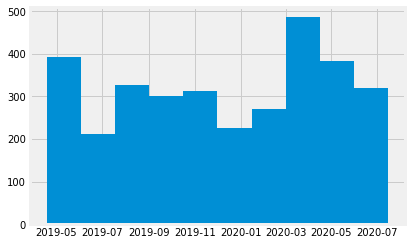

In [8]:
zb_tweets['created_at'].hist()

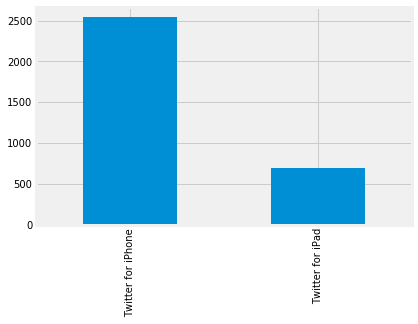

In [9]:
#z jakich urządzeń korzysta Zbigniew Boniek
zb_tweets['source'].value_counts().plot(kind='bar')

In [10]:
#funkcja, która zlicza ilość wyrazów w danym tweecie
def word_count(str):
    return len(str.split())

#funkcja, która zlicza ilość różnych wyrazów w danym tweecie
def dif_word_count(str):
    counts = dict()
    words = str.split()
    
    for word in words:
        if word in count:
            count[word] +=1
        else:
            count[word] = 1
    return counts

#funkcja zliczająca tweety
def tweet_counts(tweet_array, threshold = 10):
    unique, counts = np.unique(np.array(tweet_array), return_counts=True)
    count_dict = dict(zip(unique,counts))
    
    return [(k,v) for k,v in count_dict.items() if v > threshold]

In [11]:
#tweety pisane do konkretnych ludzi
who_zibi_replies_to = []
for tweet in zb_tweets['text']:
    if tweet[:1] == '@':
        #wzmianka
        tweet_splited = tweet.split()
        for i in range (0,len(tweet_splited)):
            if tweet_splited[i][0] == '@':
                who_zibi_replies_to.append(tweet_splited[i])
        

In [12]:
#sprawdźmy do kogo Boniek odpisywał częściej niż 5 razy
zibi_reply_counts = tweet_counts(who_zibi_replies_to, 5)
zibi_reply_counts

[('@AdamGodlewski', 9),
 ('@BL_1916', 40),
 ('@BorekMati', 47),
 ('@CeltDawid', 13),
 ('@CommonSensePL', 6),
 ('@DawidOlejnicza5', 6),
 ('@GrosickiKamil', 6),
 ('@GrzegKrychowiak', 6),
 ('@Iwanczyk_P', 7),
 ('@JOlkiewicz', 12),
 ('@JakubRzezniczak', 10),
 ('@JaroslawBinczyk', 9),
 ('@K_Stanowski', 125),
 ('@Kacpo24', 7),
 ('@KoltonRoman', 38),
 ('@LaczyNasPilka', 13),
 ('@LordKoks', 6),
 ('@LukaszOlkowicz', 12),
 ('@MKSCracoviaSSA', 8),
 ('@M_Wawrzynowski', 13),
 ('@Maciej_Sawicki', 9),
 ('@MiBiBialonski', 14),
 ('@MichalS1978', 7),
 ('@NiemiecRyszard', 6),
 ('@PiotrWolosik', 26),
 ('@Polsport', 24),
 ('@PrawdaFutbolu', 17),
 ('@RTS_Widzew_Lodz', 10),
 ('@RafalStec', 16),
 ('@RobertoRenga', 8),
 ('@SebastianMila11', 6),
 ('@SzJadczak', 21),
 ('@TSmokowski', 31),
 ('@TwaroTwaro', 7),
 ('@W_Kowal', 12),
 ('@WeszloCom', 12),
 ('@Wieslaw_Wilczyn', 6),
 ('@ZelekZyzynski', 10),
 ('@_Ekstraklasa_', 13),
 ('@cwiakala', 14),
 ('@czesmich', 17),
 ('@garnekmedia', 10),
 ('@grajmy_razem', 6),
 ('@

In [13]:
#wrzućmy to do DataFrame porządkując od największej do najmniejszej ilości wzmianek
zibi_replies_df = pd.DataFrame(zibi_reply_counts, columns=['who', 'count']).sort_values('count', ascending = False)
zibi_replies_df

,who,count
12,@K_Stanowski,125
2,@BorekMati,47
1,@BL_1916,40
14,@KoltonRoman,38
50,@mogiel90,32
32,@TSmokowski,31
24,@PiotrWolosik,26
45,@kowalski_cezary,25
25,@Polsport,24
49,@matiswiecicki,22


In [14]:
#oryginalne tweety (bez wzmianek innych użytkowników)
for tweet in zb_tweets['text']:
    if tweet[:1] != '@':
        print(tweet)

Che giocatore @EdDzeko 👌🏻👌🏻
Do @_1liga_  jeszcze daleko, ale dzisiaj po raz pierwszy w erze COVID 19 @RTS_Widzew_Lodz grał w piłkę 👏🏻👏🏻👏🏻
3-0 do przerwy, cicho sza🤞🤞🤞
RT @pzpn_pl: Od 21 listopada do 18 grudnia będzie trwał mundial w 2022 roku w Katarze.

Szczegółowy harmonogram ⤵
RT @AmpFutbolPolska: NIEZWYKLI PIŁKARZE ❤⚽

✅ PASJA 😍 
✅ RADOŚĆ 😃 
✅ MOTYWACJA 🔥

Zobaczcie jak grają najmłodsi piłkarze z niepełnosprawnoś…
Potwierdzam👍🏻 https://t.co/BUcYG76vBA
Szanowny Panie @PNisztor zgodnie z obietnicą odpowiadam:
Odp na pyt 4 - inne niż z moją żoną😜
Odp na pyt 5 - nie ma… https://t.co/7xAPRmGKeX
Gratuluje wygranej walki, oglądałem. Trzymam kciuki👊🏻👍🏻 https://t.co/UDugLCd6BY
RT @pzpn_pl: Znamy datę i godzinę meczu o Superpuchar Polski! 

📆 9 sierpnia 2020 | 20:00

Komunikat 👉 https://t.co/37TwAPtpSA https://t.co…
Pan Redaktor @PNisztor z Gazety Polskiej zwrócił się do PZPN  abyśmy odpowiedzieli (do 16.07) na 8 pytań. Na pytani… https://t.co/5588OtDB9n
Dzisiaj Pani Wiesia ma 64 urodziny❤️❤

Zarządzanie kryzysem nie jest łatwe, szczególnie gdy wkrada się nerwowość, panika, niepewność. Prywatnie podpisuje… https://t.co/Nzg1oGc2fA
Słucham Stan Futbolu i widzę, ze w Polsce nie ma epidemii czy sytuacji wyjątkowej, już są targi. Każdy w swoją stro… https://t.co/zCVlH8xCx2
Właśnie się ubrałem i poszedłem na spacer do gościnnego pokoju. Można? Oczywiście #zostajewdomu
Prof. Krzysztof Simon powinien być h24 w mediach. Mówi jak jest, niesamowity. Bez owijania, prosto, konkretnie.
RT @LaczyNasPilka: Specjalnie dla Was rozpoczynamy retransmisje historycznych meczów reprezentacji Polski z naszej Biblioteki. 🎥🇵🇱

Startuj…
Kto nastepny👍🏻👍🏻? https://t.co/0Zks6bhoul
#siedzimywdomu Trzeba to mądrze wykorzystać 🧇🧇 Tarte Tatin👍🏻👍🏻 https://t.co/q3zCyT4l4j
https://t.co/7zloFqqy6I
#zostanwdomu https://t.co/vrHdpgEBzA
Kuba masz racje, uzgodnicie z klubami zasady( sytuacja wyjątkowa) „we don’t play”, np. bezpłatne urlopy do końca za… https://t.co/6BL2dwZQMX
RT @UEFA: In the light of ongoing devel

To moja opinia na temat murawy na PGE NARODOWY. https://t.co/M7tIAhyAgJ
RT @LaczyNasPilka: BĘDZIEMY TĘSKNIĆ! ❤🇵🇱 https://t.co/5FTzyOoaAo
Dobranoc🇵🇱⚽️ https://t.co/JiWYcrdRJX
Najlepsza „9” na świecie, Polak⚽️🇵🇱 https://t.co/8yPDI2m7Zv
Brawo wszyscy, Sztab , Trener Brzęczek, Drużyna i Kibice Reprezentacji 🇵🇱
Breaking News, @kamilglik25 ma złamany nos, ale bez przemieszczenia, czyli jutro gotowy do gry.... 🇵🇱⚽️
RT @LaczyNasPilka: .@PGENarodowy gotowy! 🏟

🌙 10 stopni
💨 11 km/h
💦 82 %
__________
#POLSVN🇵🇱🇸🇮 za 240 minut https://t.co/NENqLS1J62
Dzisiaj pierwszy raz przed meczem Reprezentacji nie mam stresu. Zobaczymy wieczorem co to znaczy? 🇵🇱⚽️👍🏻
Ręcznie prane? 2016 poszło .........😜😜 https://t.co/kz84KhwiVG
I to jest dobra wiadomość....A co z „ buntownikami”? https://t.co/DIrDEkmeNe
W najbliższym czasie na terenie każdego ZPN powinny zacząć się turnieje dla dzieci. Najlepsi w lutym 2020 zawitają… https://t.co/NnQUeFC0jS
RT @LaczyNasPilka: UWAGA MAMY WAŻNY KOMUNIKAT!

Cześć Łukasz, witamy! 

In [15]:
#tylko retweety
who_zibi_retweets = []
for tweet in zb_tweets['text']:
    if tweet[:2] == 'RT':
        #retweet
        splited = tweet.split(': ')
        rt, who = splited[0].split(' ')
        who_zibi_retweets.append(who)  

In [16]:
#sprawdźmy kogo Boniek retweetował najczęściej
zibi_retweet_counts = tweet_counts(who_zibi_retweets, 5)
zibi_retweet_counts

[('@AmpFutbolPolska', 9),
 ('@FIFAcom', 6),
 ('@LaczyNasPilka', 197),
 ('@Maciej_Sawicki', 8),
 ('@MiBiBialonski', 7),
 ('@PZPNGrassroots', 23),
 ('@PZPNPuchar', 10),
 ('@RTS_Widzew_Lodz', 6),
 ('@a_delimat', 6),
 ('@adriandudacom', 8),
 ('@laczynaskobieca', 50),
 ('@mzachodny', 7),
 ('@pzpn_pl', 47),
 ('@sport_tvppl', 9)]

In [17]:
#wrzućmy to do DataFrame porządkując od największej do najmniejszej ilości retweetów
zibi_retweet_df = pd.DataFrame(zibi_retweet_counts, columns=['who', 'count']).sort_values('count', ascending = False)
zibi_retweet_df

,who,count
2,@LaczyNasPilka,197
10,@laczynaskobieca,50
12,@pzpn_pl,47
5,@PZPNGrassroots,23
6,@PZPNPuchar,10
0,@AmpFutbolPolska,9
13,@sport_tvppl,9
3,@Maciej_Sawicki,8
9,@adriandudacom,8
4,@MiBiBialonski,7


In [18]:
zb_tweets.sample(10)

,id_str,created_at,text,source,in_reply_to_user_id_str,retweet_count,favorite_count
2316,1166076696187068418,2019-08-26 19:55:23,Dott. Palaia é sempre la. Bravo👍🏻👏🏻 https://t.co/RHT953ZY16,Twitter for iPad,nan,2,80
2930,1131234881600720897,2019-05-22 16:26:27,@PaulRer @PrawdaFutbolu @KoltonRoman Jutro zatwierdzamy regulamin rozgrywek. Od sezonu 2019&gt; do dyspozycji trenera będzie 20 zawodników.,Twitter for iPhone,908763312.00,1,6
2899,1132545467349389312,2019-05-26 07:14:15,RT @OfficialASRoma: Daniele De Rossi ci ha scritto questa lettera prima della sua ultima partita con l'#ASRoma,Twitter for iPhone,nan,1721,0
3173,1121513035573624832,2019-04-25 20:35:19,"Za rok bedzie szaleństwo,przypominam spadają trzy drużyny⚽️ https://t.co/eN9WiGgngg",Twitter for iPad,nan,8,243
2657,1141713291892465664,2019-06-20 14:23:55,@StefanBielanski @RafalStec ...ale catenaccio znaczy „do przodu ale bezpiecznie” 😜😜,Twitter for iPhone,939314574.00,0,1
2129,1179448537412714496,2019-10-02 17:30:19,Tak jest 👍🏻🇵🇱⚽️ https://t.co/kdfyPBDThQ,Twitter for iPhone,nan,1,31
2821,1135828187240439808,2019-06-04 08:38:37,"RT @Onet_100: Mija 30 lat od wyborów #4czerwca - nikt nie spodziewał się ich wyniku, który zmienił układ sił w Polsce i otworzył drogę do z…",Twitter for iPhone,nan,80,0
429,1261908848912281601,2020-05-17 06:38:09,Dzisiaj kończylibyśmy rozgrywki ESA⚽️,Twitter for iPhone,nan,4,414
2178,1175532544080539648,2019-09-21 22:09:33,"RT @Michal_rylo_ABG: Jeśli myślisz ze masz ciężkie życie, to pokaże Ci mojego 9 miesięcznego synka jak walczy o to by móc oddychać normalni…",Twitter for iPad,nan,455,0
485,1259490699227078657,2020-05-10 14:29:17,"Jeżeli według Ciebie zależy to tylko od mentalu i przygotowania fizycznego to kawa nie wystarczy na wytłumaczenie,… https://t.co/7JjoiW6r2p",Twitter for iPad,nan,2,117


In [19]:
zb_tweets['year'] = pd.DatetimeIndex(zb_tweets['created_at']).year
zb_tweets['month'] = pd.DatetimeIndex(zb_tweets['created_at']).month
zb_tweets['day'] = pd.DatetimeIndex(zb_tweets['created_at']).day
zb_tweets['day_of_the_week'] = pd.DatetimeIndex(zb_tweets['created_at']).dayofweek
zb_tweets['hour'] = pd.DatetimeIndex(zb_tweets['created_at']).hour

In [20]:
weekday_map = {0: 'Poniedziałek', 1: 'Wtorek', 2: 'Środa', 3: 'Czwartek', 4: 'Piątek', 5: 'Sobota', 6: 'Niedziela'}

zb_tweets['weekday_text']=zb_tweets['day_of_the_week'].map(weekday_map)
zb_tweets.sample(5)

,id_str,created_at,text,source,in_reply_to_user_id_str,retweet_count,favorite_count,year,month,day,day_of_the_week,hour,weekday_text
2572,1155174510917763073,2019-07-27 17:54:00,1-2⚽️,Twitter for iPhone,nan,6,291,2019,7,27,5,17,Sobota
729,1249702723953602560,2020-04-13 14:15:22,@Piechocinski W piłce była jeszcze większa 👍🏻👍🏻,Twitter for iPhone,323177351.00,0,10,2020,4,13,0,14,Poniedziałek
714,1250179791380271110,2020-04-14 21:51:04,Coś pięknego 👍🏻 https://t.co/g1BJnh7Zwe,Twitter for iPad,nan,0,54,2020,4,14,1,21,Wtorek
1198,1233092663164964867,2020-02-27 18:12:55,"Rzeczywiście, to było fantastyczne🇵🇱🇵🇱 https://t.co/gkozop9ctF",Twitter for iPhone,nan,17,609,2020,2,27,3,18,Czwartek
29,1282003265241194496,2020-07-11 17:26:11,👏🏻👏🏻👏🏻dla Legii. Zasłużenie zdobyty Tytuł Mistrza 🇵🇱. Życzę powodzenia w europejskich eliminacjach👏🏻👏🏻👍🏻⚽️🏆🍾🤞,Twitter for iPhone,nan,29,1422,2020,7,11,5,17,Sobota


In [21]:
zb_tweet_freq_year = zb_tweets.groupby('year').count().reset_index()[['year','id_str']]
zb_tweet_freq_year.rename(columns={"id_str": "count"}, inplace=True)
zb_tweet_freq_year
#w 2019 mamy dane z 8,5 miesiąca, a w 2020 z 7,5; średnio wychodzi bardzo podobnie - ok. 200 tweetów na miesiąc

,year,count
0,2019,1715
1,2020,1514


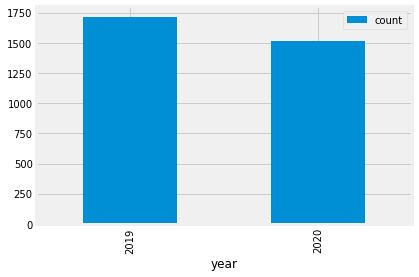

In [22]:
zb_tweet_freq_year.plot('year', 'count', kind='bar')

In [23]:
zb_tweet_freq_month = zb_tweets.groupby(['year','month']).count().reset_index()[['month','id_str']]
zb_tweet_freq_month

,month,id_str
0,4,103
1,5,281
2,6,211
3,7,106
4,8,230
5,9,160
6,10,246
7,11,207
8,12,171
9,1,143


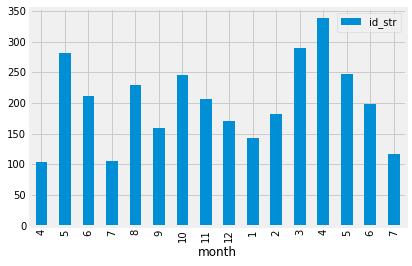

In [24]:
zb_tweet_freq_month.plot('month', 'id_str', kind='bar')

In [25]:
zb_tweet_freq_day = zb_tweets.groupby(['year','day']).count().reset_index()[['day','id_str']]
zb_tweet_freq_day.rename(columns={"id_str": "count"}, inplace=True)
zb_tweet_freq_day

zb_tweet_freq_day_mean = zb_tweet_freq_day.groupby('day').mean().reset_index()

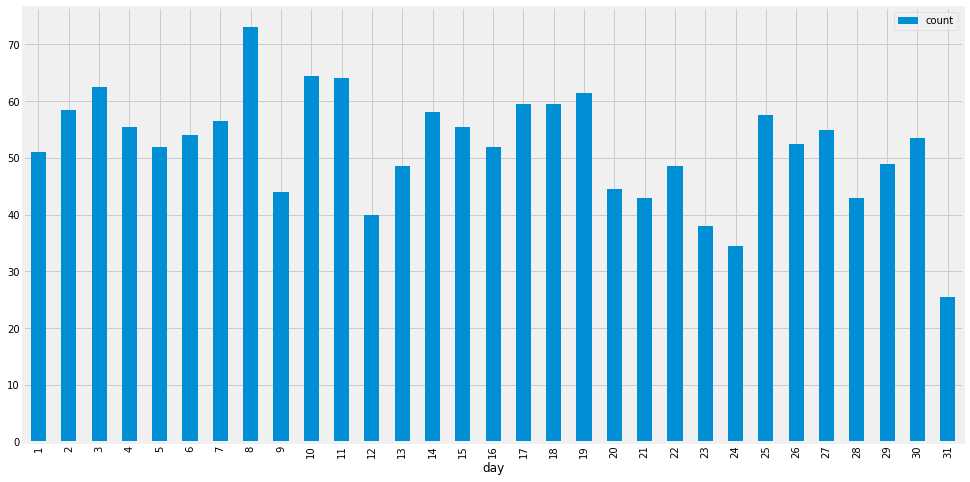

In [26]:
zb_tweet_freq_day_mean.plot('day', 'count', kind='bar', figsize=(15,8))

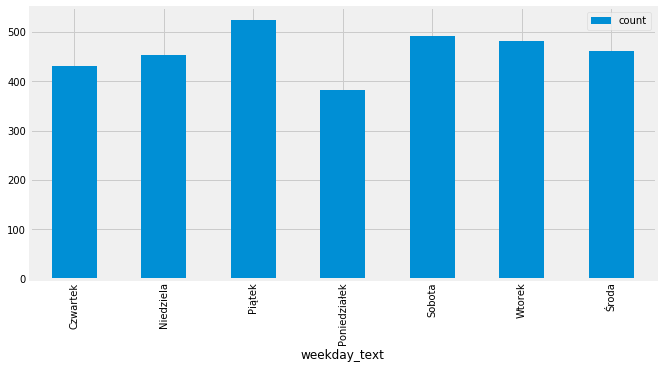

In [27]:
zb_tweet_freq_dayofweek = zb_tweets.groupby('weekday_text').count().reset_index()[['weekday_text','id_str']]
zb_tweet_freq_dayofweek.rename(columns={"id_str": "count"}, inplace=True)
zb_tweet_freq_dayofweek

zb_tweet_freq_dayofweek.plot('weekday_text', 'count', kind='bar', figsize=(10,5))

In [28]:
#trzeba tu poprawić kolejność dni, żeby było od poniedziałku do niedzieli

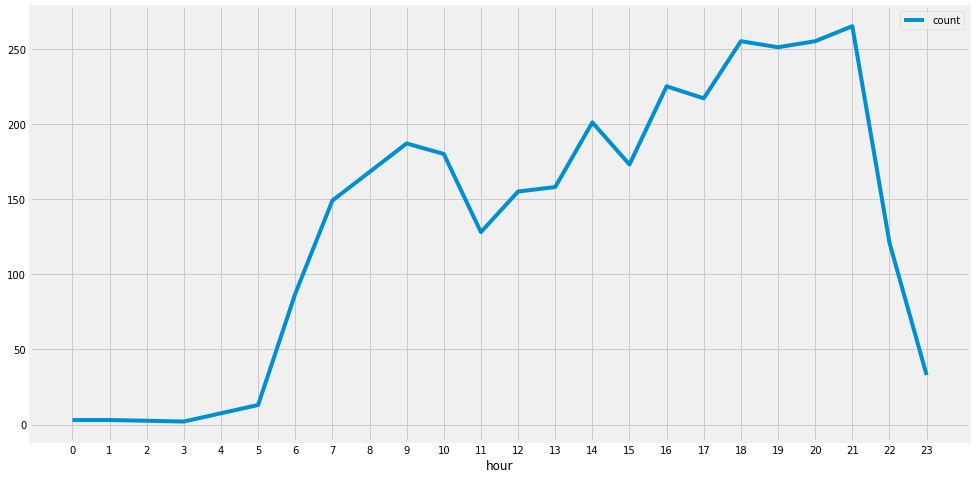

In [29]:
zb_tweet_freq_hour = zb_tweets.groupby('hour').count().reset_index()[['hour','id_str']]
zb_tweet_freq_hour.rename(columns={"id_str": "count"}, inplace=True)
zb_tweet_freq_hour

zb_tweet_freq_hour.plot('hour', 'count', kind='line', figsize=(15,8), xticks=np.arange(0, 24, 1))

In [30]:
zb_tweets.corr()

,id_str,in_reply_to_user_id_str,retweet_count,favorite_count,year,month,day,day_of_the_week,hour
id_str,1.00,-0.04,0.02,0.10,0.88,-0.26,-0.06,0.04,-0.02
in_reply_to_user_id_str,-0.04,1.00,-0.03,-0.06,-0.06,0.06,0.03,0.02,-0.02
retweet_count,0.02,-0.03,1.00,0.01,0.02,-0.01,0.03,0.02,0.01
favorite_count,0.10,-0.06,0.01,1.00,0.09,-0.03,0.00,-0.01,-0.03
year,0.88,-0.06,0.02,0.09,1.00,-0.69,-0.04,0.03,0.00
month,-0.26,0.06,-0.01,-0.03,-0.69,1.00,-0.11,0.00,-0.03
day,-0.06,0.03,0.03,0.00,-0.04,-0.11,1.00,0.00,-0.02
day_of_the_week,0.04,0.02,0.02,-0.01,0.03,0.00,0.00,1.00,-0.06
hour,-0.02,-0.02,0.01,-0.03,0.00,-0.03,-0.02,-0.06,1.00


In [31]:
import seaborn as sn

In [32]:
corr_df = zb_tweets[['retweet_count', 'favorite_count', 'day_of_the_week', 'hour']]

In [33]:
corr_df.head(5)

,retweet_count,favorite_count,day_of_the_week,hour
0,10,33,2,20
1,6,282,2,19
2,2,37,2,18
3,3,396,2,18
4,5,0,2,16


In [34]:
corr_df.corr()

,retweet_count,favorite_count,day_of_the_week,hour
retweet_count,1.00,0.01,0.02,0.01
favorite_count,0.01,1.00,-0.01,-0.03
day_of_the_week,0.02,-0.01,1.00,-0.06
hour,0.01,-0.03,-0.06,1.00


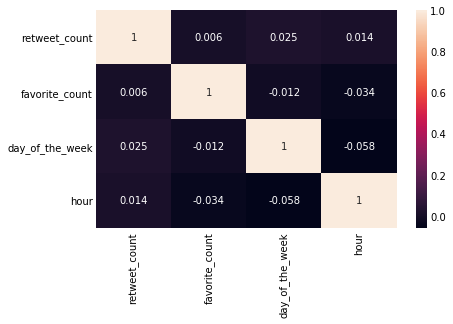

In [35]:
#check correlation between fav, retweets and time, date
corrMatrix = corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [36]:
from langdetect import detect

In [37]:
detect('Bardzo dobry mecz w Legnicy @_1liga_')

'pl'

In [38]:
zb_tweets.head(5)

,id_str,created_at,text,source,in_reply_to_user_id_str,retweet_count,favorite_count,year,month,day,day_of_the_week,hour,weekday_text
0,1283500768004366336,2020-07-15 20:36:44,Che giocatore @EdDzeko 👌🏻👌🏻,Twitter for iPhone,nan,10,33,2020,7,15,2,20,Środa
1,1283477506813825025,2020-07-15 19:04:18,"Do @_1liga_ jeszcze daleko, ale dzisiaj po raz pierwszy w erze COVID 19 @RTS_Widzew_Lodz grał w piłkę 👏🏻👏🏻👏🏻",Twitter for iPhone,nan,6,282,2020,7,15,2,19,Środa
2,1283463141880475648,2020-07-15 18:07:13,@TSP_SA w Esa. Gratuluje serdecznie. Brawo👍🏻👍🏻,Twitter for iPhone,1922779010.00,2,37,2020,7,15,2,18,Środa
3,1283461568051765248,2020-07-15 18:00:58,"3-0 do przerwy, cicho sza🤞🤞🤞",Twitter for iPhone,nan,3,396,2020,7,15,2,18,Środa
4,1283439195894292482,2020-07-15 16:32:04,RT @pzpn_pl: Od 21 listopada do 18 grudnia będzie trwał mundial w 2022 roku w Katarze.\r\n\r\nSzczegółowy harmonogram ⤵,Twitter for iPhone,nan,5,0,2020,7,15,2,16,Środa


In [59]:
for i, row in zb_tweets.iterrows():
    try:
        zb_tweets.at[i, 'language'] = detect(row['text'])
    except:
        zb_tweets.at[i, 'language'] = 'detection error'
        print(row['text'])

https://t.co/UDxPvdJXY3
👏🏻👏🏻👏🏻 https://t.co/C1I1q4l1dq
https://t.co/0EHfvVcJlc. https://t.co/fXQjjVuBau
👏🏻👏🏻👏🏻 https://t.co/ZYELkejGTV
1️⃣0️⃣0️⃣ lat 1️⃣0️⃣0️⃣ lat.......🌷👍🏻⚽️ https://t.co/0cjTnrhKkO
⚽️⚽️⚽️❤️❤️🇵🇱🇵🇱🇵🇱 https://t.co/TrQmRlvg5P
1-1
???⚽️🇵🇱⚽️ https://t.co/dDf4WkZgt5
👍🏻⚽️🇵🇱 https://t.co/QVKmnob72y
👏🏻👏🏻 https://t.co/f5IjbnITDQ
2023 https://t.co/QunhaUOIUc
https://t.co/7zloFqqy6I
4-2?
😜😜😜 https://t.co/892wFMjLCW
❤️👍🏻❤️ https://t.co/sKdktjs6aN
https://t.co/FPA2awsF7o
😜♥️😜 https://t.co/oEDBel6Vo9
❤️👍🏻🙏🙏 https://t.co/T6xzNU8yhD
👏🏻👏🏻🎾🎾 https://t.co/VCnZ9IOk5m
👏🏻👏🏻 https://t.co/BhRRTkytqd
👏🏻👏🏻 https://t.co/SzK586xNKO
👏🏻👏🏻👏🏻 https://t.co/qNI5hbfMgr
👊🏻⚽️🇵🇱 https://t.co/PVvc1MYovv
👏🏻👏🏻 https://t.co/XlfbNsBKjK
👏🏻👏🏻👏🏻 https://t.co/Mh4yYPJeCG
🇵🇱🇵🇱👏🏻👏🏻 https://t.co/yCXq8fusSB
😂😂 https://t.co/LhRckZXYVl
👊🏻👍🏻 https://t.co/ToIOuzHdUd
❤️❤️❤️ https://t.co/sYdHYmb3R0
U-21🇵🇱⚽️😜 https://t.co/0QtKT7Kvpe
😂😂 https://t.co/9fWz0X3qDq
♥️♥️♥️ https://t.co/LceFxzOEnH
2-0👍🏻
👏🏻👏🏻 https://t.co/TcZcFjbhNq
1-2

In [60]:
zb_tweets.head(5)

,id_str,created_at,text,source,in_reply_to_user_id_str,retweet_count,favorite_count,year,month,day,day_of_the_week,hour,weekday_text,language
0,1283500768004366336,2020-07-15 20:36:44,Che giocatore @EdDzeko 👌🏻👌🏻,Twitter for iPhone,nan,10,33,2020,7,15,2,20,Środa,it
1,1283477506813825025,2020-07-15 19:04:18,"Do @_1liga_ jeszcze daleko, ale dzisiaj po raz pierwszy w erze COVID 19 @RTS_Widzew_Lodz grał w piłkę 👏🏻👏🏻👏🏻",Twitter for iPhone,nan,6,282,2020,7,15,2,19,Środa,pl
2,1283463141880475648,2020-07-15 18:07:13,@TSP_SA w Esa. Gratuluje serdecznie. Brawo👍🏻👍🏻,Twitter for iPhone,1922779010.00,2,37,2020,7,15,2,18,Środa,pl
3,1283461568051765248,2020-07-15 18:00:58,"3-0 do przerwy, cicho sza🤞🤞🤞",Twitter for iPhone,nan,3,396,2020,7,15,2,18,Środa,pl
4,1283439195894292482,2020-07-15 16:32:04,RT @pzpn_pl: Od 21 listopada do 18 grudnia będzie trwał mundial w 2022 roku w Katarze.\r\n\r\nSzczegółowy harmonogram ⤵,Twitter for iPhone,nan,5,0,2020,7,15,2,16,Środa,pl


In [97]:
zb_tweets[zb_tweets['language'] != 'pl']
#niestety sporo źle zakwalifikowanych tweetow - można spróbować poprawić wyniki używając NLTK

,id_str,created_at,text,source,in_reply_to_user_id_str,retweet_count,favorite_count,year,month,day,day_of_the_week,hour,weekday_text,language,language_gen
0,1283500768004366336,2020-07-15 20:36:44,Che giocatore @EdDzeko 👌🏻👌🏻,Twitter for iPhone,nan,10,33,2020,7,15,2,20,Środa,it,it
21,1282245037376638977,2020-07-12 09:26:54,"Jest jeszcze Cabrini, Bettega, Gentile👍🏻👍🏻 https://t.co/RQmt9kZZfC",Twitter for iPhone,nan,2,29,2020,7,12,6,9,Niedziela,hu,other
33,1281856410716909568,2020-07-11 07:42:38,Oby... https://t.co/SS1II771J0,Twitter for iPhone,nan,2,43,2020,7,11,5,7,Sobota,cs,other
42,1281623468098891777,2020-07-10 16:17:00,Dopisujemy👍🏻👍🏻 https://t.co/ZnZacVxqeb,Twitter for iPhone,nan,1,25,2020,7,10,4,16,Piątek,hr,other
56,1280774816216293381,2020-07-08 08:04:46,https://t.co/UDxPvdJXY3,Twitter for iPhone,nan,27,46,2020,7,8,2,8,Środa,detection error,detection error
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,1121137520408977408,2019-04-24 19:43:09,Ale fajnie⚽️,Twitter for iPhone,nan,0,100,2019,4,24,2,19,Środa,hu,other
3204,1121037228619255809,2019-04-24 13:04:37,@samkickerPL @_Yeck Jakby to ode mnie........,Twitter for iPhone,nan,0,0,2019,4,24,2,13,Środa,sk,other
3209,1120316225396117507,2019-04-22 13:19:37,RT @Havenlust: There's two types of golfers ... 😊💗 https://t.co/elHPR4dtVN,Twitter for iPhone,nan,3583,0,2019,4,22,0,13,Poniedziałek,en,en
3210,1119278581883056129,2019-04-19 16:36:23,"RT @Anjafbakken: Ikke bare er han god i banen, men han er en ganske god barnevakt også🌟 Mellby Frodo😍 https://t.co/HixENfKkN8",Twitter for iPhone,nan,70,0,2019,4,19,4,16,Piątek,no,other


In [98]:
zb_tweets['language'].value_counts()

pl                 2856
it                  126
detection error      44
en                   42
hr                   17
hu                   15
id                   13
af                   10
de                    9
et                    9
tl                    8
no                    8
sl                    8
pt                    8
es                    7
ro                    6
fr                    6
cs                    5
sk                    5
cy                    4
sv                    4
sw                    4
fi                    3
lv                    3
tr                    2
lt                    2
so                    2
ca                    1
da                    1
nl                    1
Name: language, dtype: int64

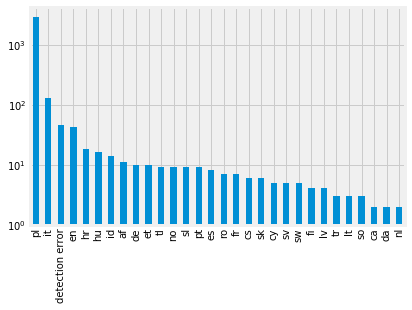

In [67]:
zb_tweets['language'].value_counts().plot(kind='bar', log=True)

In [92]:
lang_count = zb_tweets['language'].value_counts()

In [93]:
lang_count['pl']

2856

In [94]:
#pętla przypisująca other do języków, które występują mniej niż 20 razy - minimalizacja pomyłki + przygotowanie do pie chart

for i, row in zb_tweets.iterrows():
    if lang_count[row['language']] < 20:
        zb_tweets.at[i, 'language_gen'] = 'other'
    else:
        zb_tweets.at[i, 'language_gen'] = row['language']

In [95]:
lang_count = zb_tweets['language_gen'].value_counts()
lang_count_labels = lang_count.index.to_list()
lang_count_labels

['pl', 'other', 'it', 'detection error', 'en']

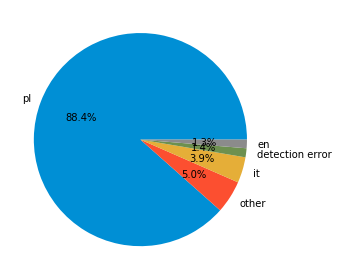

In [104]:
plt.pie(zb_tweets['language_gen'].value_counts(), labels=lang_count_labels, autopct='%1.1f%%')
plt.tight_layout()

In [99]:
zb_tweets

,id_str,created_at,text,source,in_reply_to_user_id_str,retweet_count,favorite_count,year,month,day,day_of_the_week,hour,weekday_text,language,language_gen
0,1283500768004366336,2020-07-15 20:36:44,Che giocatore @EdDzeko 👌🏻👌🏻,Twitter for iPhone,nan,10,33,2020,7,15,2,20,Środa,it,it
1,1283477506813825025,2020-07-15 19:04:18,"Do @_1liga_ jeszcze daleko, ale dzisiaj po raz pierwszy w erze COVID 19 @RTS_Widzew_Lodz grał w piłkę 👏🏻👏🏻👏🏻",Twitter for iPhone,nan,6,282,2020,7,15,2,19,Środa,pl,pl
2,1283463141880475648,2020-07-15 18:07:13,@TSP_SA w Esa. Gratuluje serdecznie. Brawo👍🏻👍🏻,Twitter for iPhone,1922779010.00,2,37,2020,7,15,2,18,Środa,pl,pl
3,1283461568051765248,2020-07-15 18:00:58,"3-0 do przerwy, cicho sza🤞🤞🤞",Twitter for iPhone,nan,3,396,2020,7,15,2,18,Środa,pl,pl
4,1283439195894292482,2020-07-15 16:32:04,RT @pzpn_pl: Od 21 listopada do 18 grudnia będzie trwał mundial w 2022 roku w Katarze.\r\n\r\nSzczegółowy harmonogram ⤵,Twitter for iPhone,nan,5,0,2020,7,15,2,16,Środa,pl,pl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,1118621240846114818,2019-04-17 21:04:21,"Podobne mecze, bramki, zmiany wyników widziałem tylko na finałach Tymbarku⚽️👍🏻",Twitter for iPad,nan,5,326,2019,4,17,2,21,Środa,pl,pl
3225,1118619665067139073,2019-04-17 20:58:05,"To co mnie uderzyło to pokora i zachowanie piłkarzy i trenerów po kryzysowych decyzjach, klasa👍🏻",Twitter for iPad,nan,8,584,2019,4,17,2,20,Środa,pl,pl
3226,1118600322094641152,2019-04-17 19:41:14,Rozbieżności naukowe👍🏻 https://t.co/1ysIFQVzwQ,Twitter for iPad,nan,0,32,2019,4,17,2,19,Środa,pl,pl
3227,1118598074706923521,2019-04-17 19:32:18,@BogusLWAW Smacznego.,Twitter for iPad,2986999313.00,0,10,2019,4,17,2,19,Środa,pl,pl


In [108]:
account_grow = zb_tweets.groupby(['year', 'month'])['favorite_count', 'retweet_count'].mean().reset_index()

C:\Users\Slawek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [114]:
account_grow['period'] = account_grow['year'].astype(str) + '-' + account_grow['month'].astype(str)
account_grow

,year,month,favorite_count,retweet_count,period
0,2019,4,174.50,41.17,2019-4
1,2019,5,177.50,13.29,2019-5
2,2019,6,178.52,8.10,2019-6
3,2019,7,178.12,5.19,2019-7
4,2019,8,136.50,7.11,2019-8
5,2019,9,178.74,15.24,2019-9
6,2019,10,170.22,7.82,2019-10
7,2019,11,185.43,8.25,2019-11
8,2019,12,283.73,8.32,2019-12
9,2020,1,202.04,8.85,2020-1


C:\Users\Slawek\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Slawek\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Slawek\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


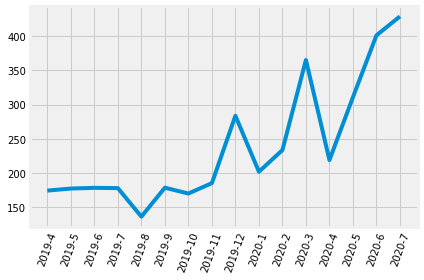

In [118]:
#Wykres wzrostu popularności (liczba 'lajków')
plt.plot(account_grow['period'], account_grow['favorite_count'])
plt.xticks(rotation=70)
plt.tight_layout()

In [119]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [142]:
account_grow['month_nu'] = np.arange(len(account_grow))
x = np.array(account_grow['month_nu']).reshape((-1, 1))
y = np.array(account_grow['favorite_count'])

In [143]:
x

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15]])

In [124]:
y

array([174.50485437, 177.50177936, 178.51658768, 178.12264151,
       136.50434783, 178.7375    , 170.2195122 , 185.43478261,
       283.73099415, 202.04195804, 233.65384615, 365.11764706,
       219.06508876, 310.76518219, 401.11055276, 428.67241379])

In [125]:
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [128]:
model.score(x, y)

0.6669000454456349

In [133]:
x_prep = np.arange(0, 28, 1)
x_to_predict = np.array(x_prep).reshape((-1, 1))
x_to_predict

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27]])

In [134]:
predicted_values = model.predict(x_to_predict)
predicted_values = list(predicted_values)
predicted_values

[121.94502775335921,
 137.54985479001678,
 153.15468182667433,
 168.7595088633319,
 184.36433589998944,
 199.969162936647,
 215.57398997330455,
 231.17881700996213,
 246.78364404661966,
 262.38847108327724,
 277.99329811993476,
 293.59812515659235,
 309.2029521932499,
 324.80777922990745,
 340.41260626656504,
 356.01743330322256,
 371.62226033988014,
 387.2270873765377,
 402.83191441319525,
 418.43674144985283,
 434.04156848651036,
 449.64639552316794,
 465.25122255982546,
 480.85604959648305,
 496.46087663314063,
 512.0657036697982,
 527.6705307064557,
 543.2753577431132]

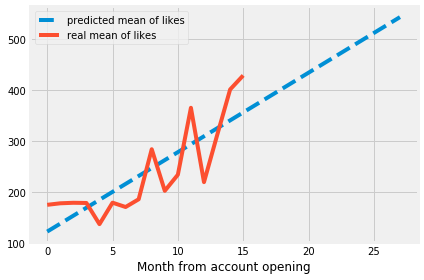

In [153]:
#Wykres przedstawiający trend średniej ilości polubień (można by było pobawić się z osią x, żeby przedstawiała daty)
plt.plot(x_to_predict, predicted_values, linestyle='--', label='predicted mean of likes')
plt.plot(x, y, label='real mean of likes')
plt.legend()
plt.xlabel('Month from account opening')
plt.tight_layout()

In [154]:
#funkcja przewidująca średnią liczbę lajków w kolejnym miesiącu od założenia konta
def fav_mean(month_num):
    return model.predict(month_num)

In [155]:
fav_mean(44)

array([808.55741737])